In [17]:
import pandas as pd
import missingno as msno
from sklearn.preprocessing import LabelEncoder

In [86]:
# merge features and label
df_meta = pd.read_csv('../../preprocessing/datasets/tracks_with_genre_small.csv')
df_features = pd.read_csv('../../feature_extraction/features/mfccs.csv')

merged_df = df_meta.merge(df_features, on='track_id', how='outer')


In [87]:
used_columns = ['depth_5_genre_name'] + df_features.columns.tolist()

In [88]:
used_columns.remove('Unnamed: 0')

ValueError: list.remove(x): x not in list

In [89]:
used_columns

['depth_5_genre_name',
 'track_id',
 'MFCC_1',
 'MFCC_2',
 'MFCC_3',
 'MFCC_4',
 'MFCC_5',
 'MFCC_6',
 'MFCC_7',
 'MFCC_8',
 'MFCC_9',
 'MFCC_10',
 'MFCC_11',
 'MFCC_12',
 'MFCC_13',
 'MFCC_14',
 'MFCC_15',
 'MFCC_16',
 'MFCC_17',
 'MFCC_18',
 'MFCC_19',
 'MFCC_20']

In [90]:
merged_df = merged_df[used_columns]

In [91]:
print(len(merged_df))

13246


In [92]:
merged_df = merged_df.dropna()

In [93]:
print(len(merged_df))

13238


In [94]:
# define features and label
feature_list = merged_df.columns.tolist()[2:]

y = merged_df['depth_5_genre_name']
X = merged_df[feature_list]

In [95]:
feature_list

['MFCC_1',
 'MFCC_2',
 'MFCC_3',
 'MFCC_4',
 'MFCC_5',
 'MFCC_6',
 'MFCC_7',
 'MFCC_8',
 'MFCC_9',
 'MFCC_10',
 'MFCC_11',
 'MFCC_12',
 'MFCC_13',
 'MFCC_14',
 'MFCC_15',
 'MFCC_16',
 'MFCC_17',
 'MFCC_18',
 'MFCC_19',
 'MFCC_20']

<Axes: >

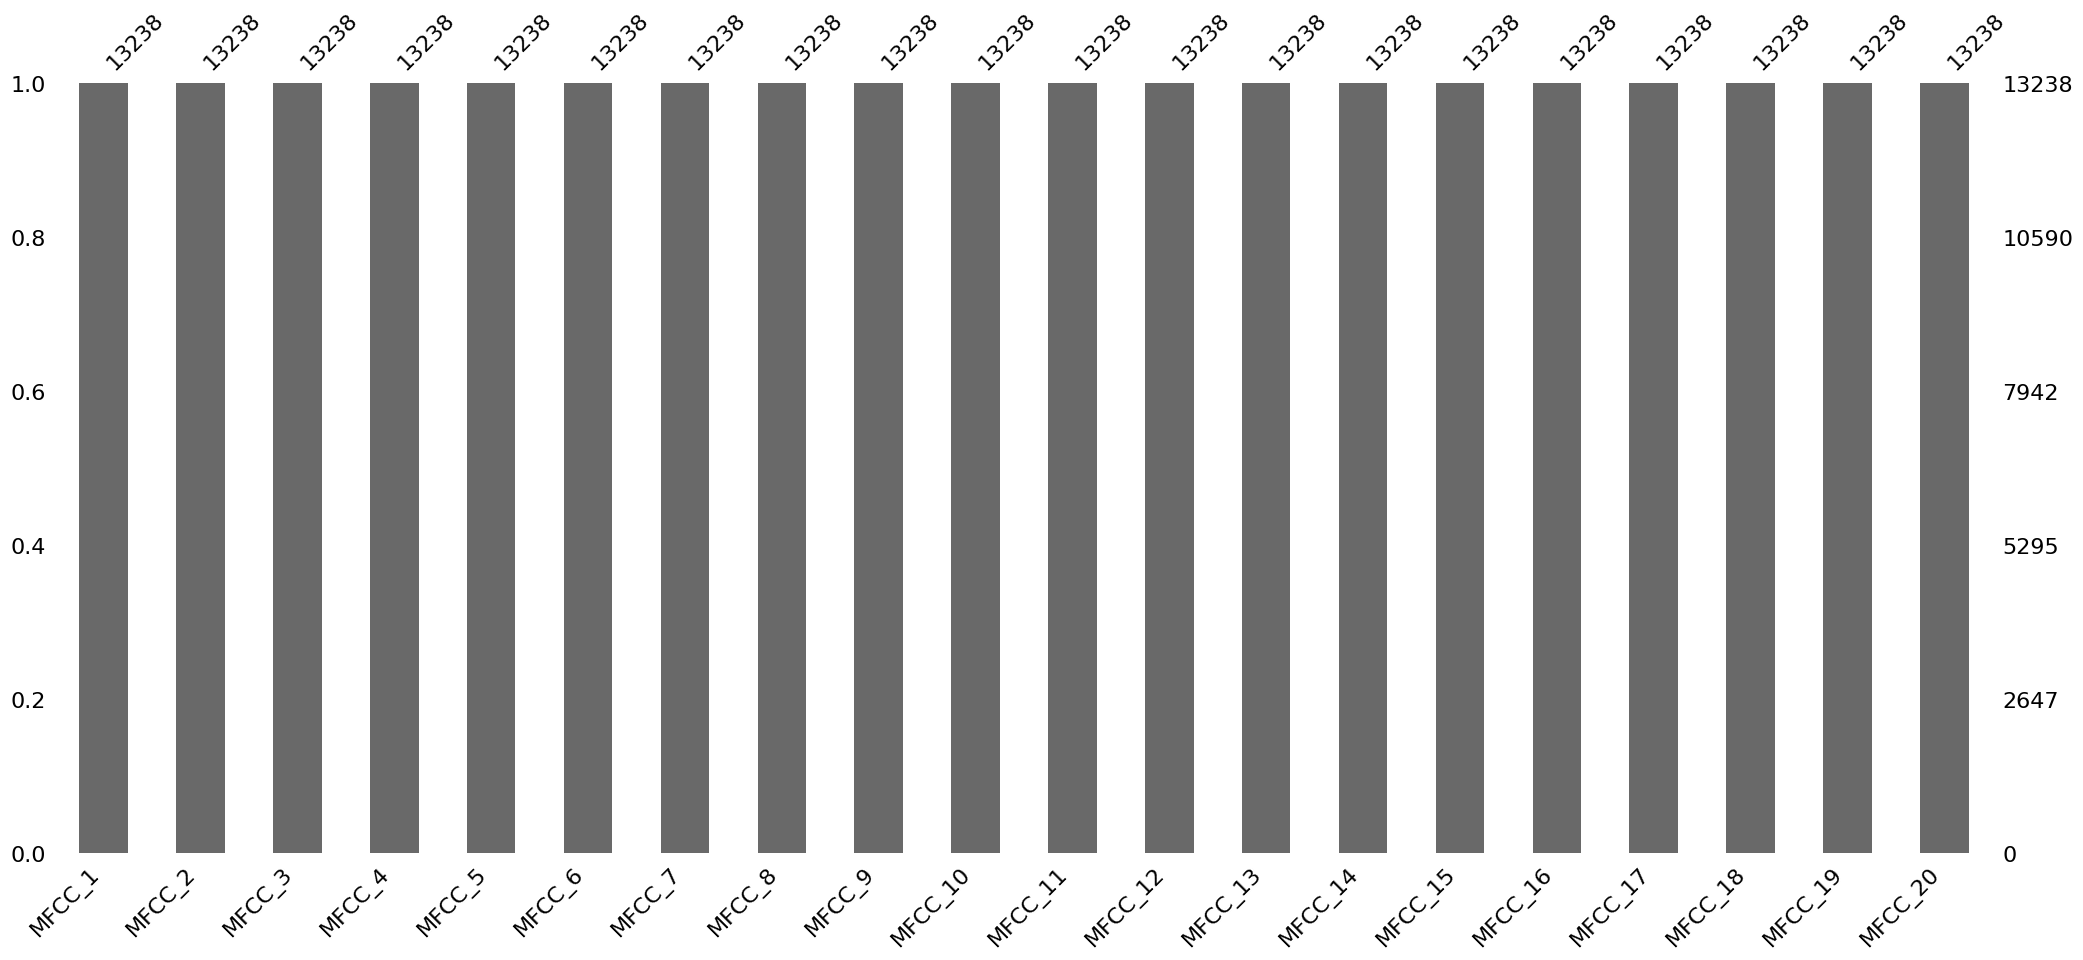

In [97]:
msno.bar(X)

In [98]:
y.unique()

array(['Hip-Hop', 'Pop', 'Folk', 'Avant-Garde', 'Lo-Fi', 'Rock', 'Metal',
       'Post-Punk', 'Krautrock', 'Punk', 'Electroacoustic',
       'Reggae - Dub', 'Latin America', 'Loud-Rock', 'Psych-Rock',
       'Indie-Rock', 'International', 'Free-Folk', 'Noise', 'Noise-Rock',
       'Audio Collage', 'Drone', 'Electronic', 'Psych-Folk',
       'Field Recordings', 'Experimental', 'Progressive',
       'Experimental Pop', 'Post-Rock', 'Polka', 'Balkan', 'Garage',
       'Hardcore', 'Singer-Songwriter', 'Europe', 'African',
       'Middle East', 'French', 'Sound Collage', 'Freak-Folk',
       'Death-Metal', 'Electro-Punk', 'Unclassifiable',
       'Alternative Hip-Hop', 'Compilation', 'Industrial', 'IDM',
       'New Wave', 'Rap', 'Drum & Bass', 'Holiday', 'Trip-Hop',
       'North African', 'Chip Music', 'Breakcore - Hard', 'Soundtrack',
       'Instrumental', 'Synth Pop', 'Techno', 'Indian',
       'South Indian Traditional', 'Asia-Far East', 'Afrobeat', 'Surf',
       'Black-Metal', 'Chip

In [99]:
# scaler
import sklearn
from sklearn import preprocessing 
scaler = preprocessing.MinMaxScaler()
label_encoder = preprocessing.LabelEncoder()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = label_encoder.fit_transform(y)

In [100]:
y

array([46, 46, 79, ..., 34, 46, 47])

In [101]:
X_scaled.head()

,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,MFCC_10,MFCC_11,MFCC_12,MFCC_13,MFCC_14,MFCC_15,MFCC_16,MFCC_17,MFCC_18,MFCC_19,MFCC_20
0,0.814433,0.441165,0.454734,0.479719,0.483467,0.621976,0.478207,0.634594,0.542801,0.632546,0.403114,0.691606,0.462157,0.719704,0.520207,0.586388,0.423355,0.493065,0.429066,0.420074
1,0.784677,0.500705,0.548197,0.539637,0.506124,0.641882,0.447880,0.762004,0.549034,0.613832,0.514440,0.764306,0.579668,0.693797,0.587037,0.571558,0.502464,0.511341,0.463714,0.430719
2,0.853047,0.521272,0.305035,0.584352,0.476883,0.551620,0.479111,0.599260,0.557418,0.622417,0.421067,0.668376,0.411864,0.618943,0.497624,0.546601,0.513525,0.593599,0.469562,0.475272
3,0.653098,0.538081,0.647854,0.595945,0.719670,0.625451,0.617899,0.620684,0.638029,0.680576,0.487238,0.596505,0.420481,0.606989,0.460691,0.566197,0.495151,0.494255,0.390144,0.380465
4,0.707129,0.578190,0.498348,0.542191,0.598482,0.482560,0.594211,0.494396,0.636243,0.624390,0.511669,0.561432,0.462664,0.602678,0.568260,0.619594,0.583330,0.567192,0.355783,0.375121


<Axes: >

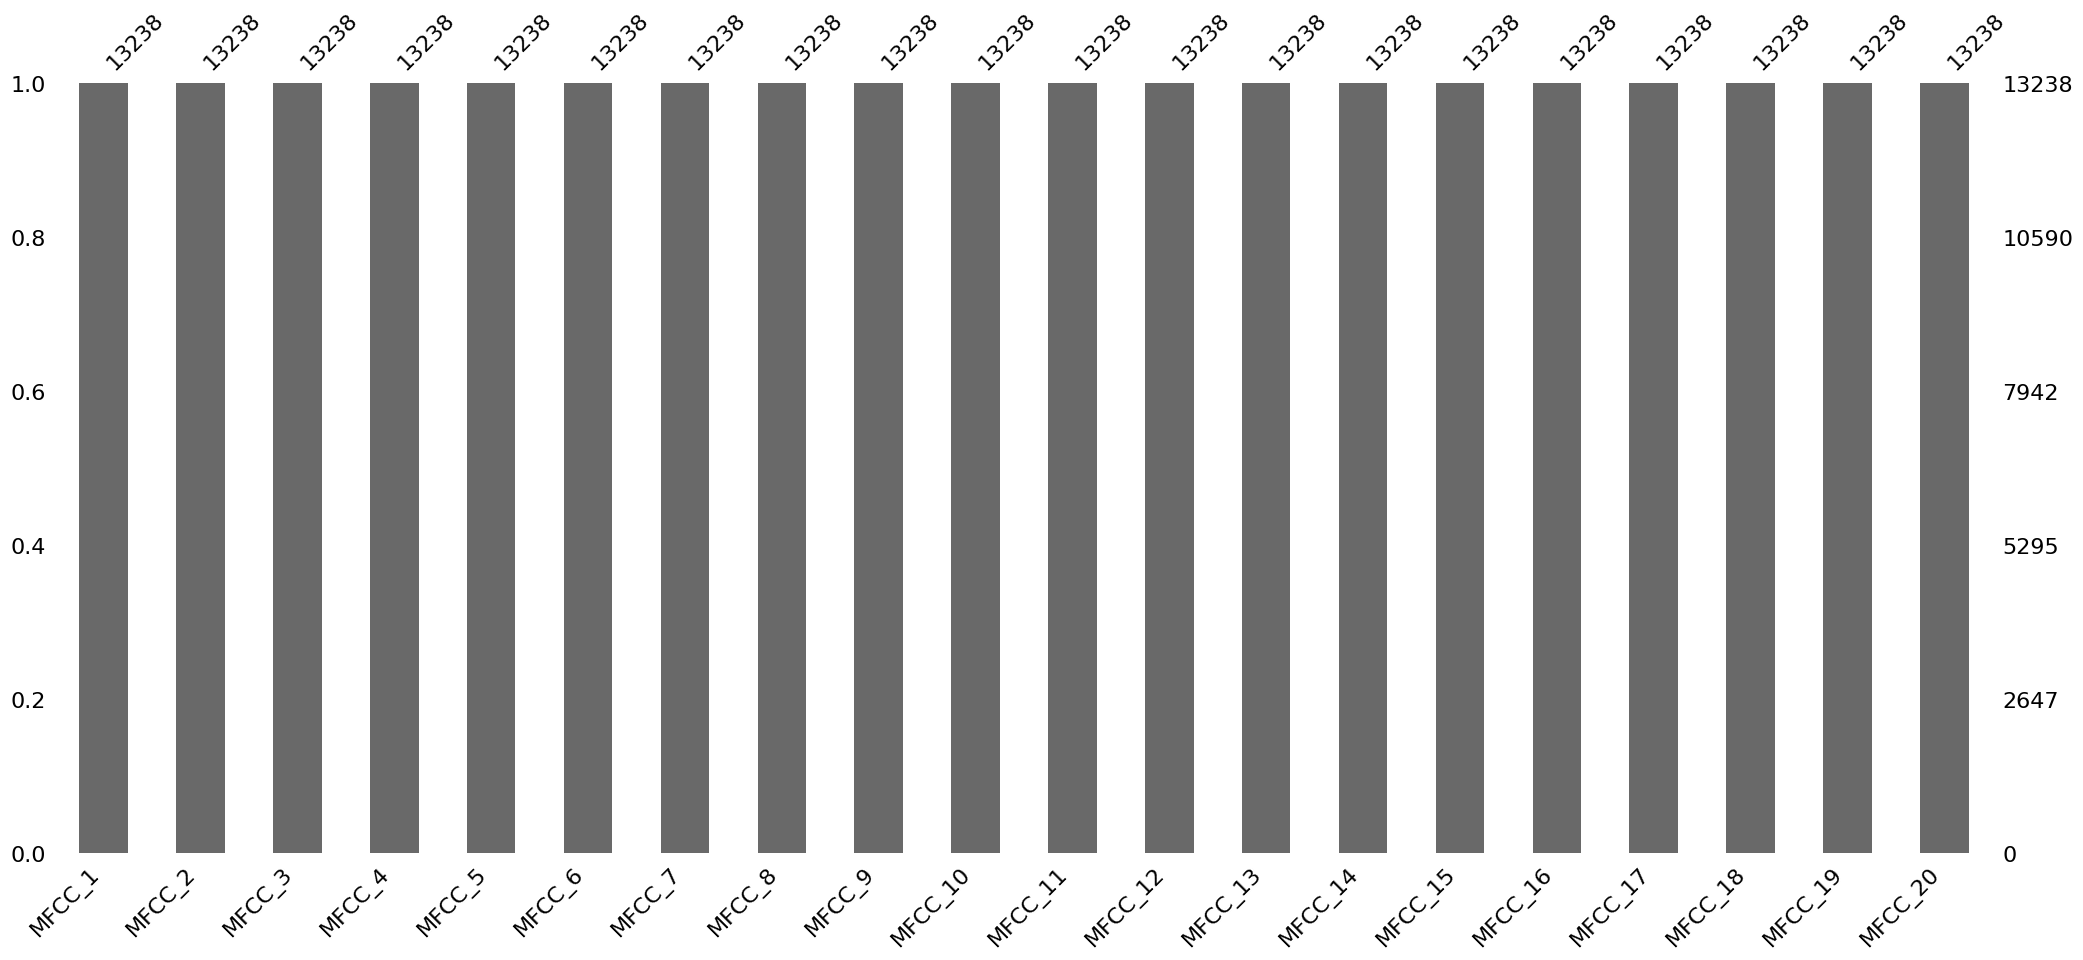

In [102]:
msno.bar(X_scaled)

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)



In [104]:
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model.fit(X_train, y_train)

# model = SVC()
# model.fit(X_train, y_train)

# prediction
y_preds = model.predict(X_test)

print("Accuracy: %.2f" % accuracy_score(y_test, y_preds))

/Users/1108232/PycharmProjects/MADS-699-Capstone-fa23-team12/venv/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/1108232/PycharmProjects/MADS-699-Capstone-fa23-team12/venv/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/1108232/PycharmProjects/MADS-699-Capstone-fa23-team12/venv/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/1108232/PycharmProjects/MADS-699-Capstone-fa23-team12/venv/lib/python3.9/site-packages/xgboost/data.py:359: Future

Accuracy: 0.11
